Dataset link - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Advantages Of Decision Tree

1. Simple to understand and to interpret. Trees can be visualized.
2. Requires little data preparation. Other techniques often require data 
normalization, dummy variables need to be created and blank values to be removed. 
Note however that this module does not support missing values.
3. Able to handle both numerical and categorical data.
4. Able to handle multi-output problems.
5. Uses a white box model. Results are easy to interpret.
6. Possible to validate a model using statistical tests. That makes it 
possible to account for the reliability of the model.

# Disadvantages Of Decision Tree

1. Decision-tree learners can create over-complex trees that do not 
generalize the data well. This is called overfitting. Mechanisms such as pruning, 
setting the minimum number of samples required at a leaf node or setting the 
maximum depth of the tree are necessary to avoid this problem.
2. Decision trees can be unstable because small variations in the data might 
result in a completely different tree being generated. This problem is mitigated 
by using decision trees within an ensemble.
3. Decision tree learners create biased trees if some classes dominate. It is 
therefore recommended to balance the dataset prior to fitting with the decision 
tree.


#### class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

### Compute the pruning path during Minimal Cost-Complexity Pruning.

##### ccp_path : (Bunch) : 
Dictionary-like object, with the following attributes.
##### ccp_alphas :  (ndarray) : 
Effective alphas of subtree during pruning.
#####  impurities  :  (ndarray) :
Sum of the impurities of the subtree leaves for the corresponding alpha value in ccp_alphas.


The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree.

Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path='../input/creditcardfraud/creditcard.csv'

In [3]:
df_ = pd.read_csv(path)
print(df_.columns)
df_.head(5)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df_.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


So we can see Time & Amount column has way much higher value compared to V1,V2, ... V28 , so we need to scale it down but before that we need to check null value & outliers

In [5]:
print("shape : ",df_.shape)
_tmp=df_.duplicated().tolist()
op="Yes" if any(_tmp)==True else "No"
print("duplicated row : ",op,end="\n")
print("null value count : \n",df_.isnull().sum(),end="\n")

shape :  (284807, 31)
duplicated row :  Yes
null value count : 
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Though we see duplicated rows here but dropping them is not a good idea because the a little variance is important for us , a slight change in transaction pattern may lead us to a fraud detection

In [6]:
duplicated=df_[df_.duplicated(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Class'])]
print(duplicated)

            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

In [7]:
#df_.drop(duplicated,axis=1,inplace=True)
# print("shape : ",df_.shape)
# _tmp=df_.duplicated().tolist()
# op="Yes" if any(_tmp)==True else "No"
# print("duplicated row : ",op,end="\n")

In [8]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

value count %
 (-25.692, 2569.116]       99.855341
(2569.116, 5138.232]       0.126401
(5138.232, 7707.348]       0.012640
(7707.348, 10276.464]      0.003511
(10276.464, 12845.58]      0.000702
(17983.812, 20552.928]     0.000702
(12845.58, 15414.696]      0.000351
(23122.044, 25691.16]      0.000351
(15414.696, 17983.812]     0.000000
(20552.928, 23122.044]     0.000000
Name: Amount, dtype: float64


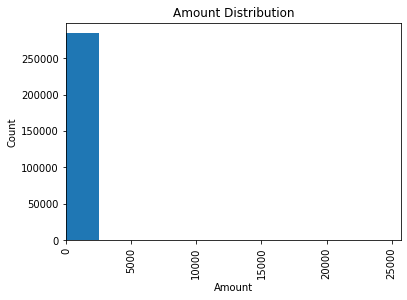

In [9]:
_,ax=plt.subplots(1,1)
bin_size=10
values=pd.cut(df_["Amount"],bins=bin_size,include_lowest=True).value_counts()/len(df_)
print("value count %\n",values*100)
ax.hist(df_["Amount"].values,bins=bin_size)
ax.set_xlim(min(df_["Amount"]),max(df_["Amount"]))
ax.set_xlabel("Amount")
ax.set_ylabel("Count")
ax.set_title("Amount Distribution")
plt.xticks(rotation=90)

plt.show()


value count %
 (74876.533, 80636.267]      5.668400
(138233.6, 143993.333]      4.848898
(143993.333, 149753.067]    4.842226
(120954.4, 126714.133]      4.724252
(69116.8, 74876.533]        4.701429
(63357.067, 69116.8]        4.681416
(149753.067, 155512.8]      4.626993
(34558.4, 40318.133]        4.618215
(40318.133, 46077.867]      4.568357
(126714.133, 132473.867]    4.512881
(132473.867, 138233.6]      4.439147
(57597.333, 63357.067]      4.434582
(51837.6, 57597.333]        4.419484
(46077.867, 51837.6]        4.340483
(155512.8, 161272.533]      4.316959
(161272.533, 167032.267]    4.295540
(80636.267, 86396.0]        3.760090
(28798.667, 34558.4]        3.485869
(115194.667, 120954.4]      3.359468
(167032.267, 172792.0]      2.969730
(-172.793, 5759.733]        1.964488
(109434.933, 115194.667]    1.918843
(86396.0, 92155.733]        1.795602
(23038.933, 28798.667]      1.549470
(92155.733, 97915.467]      1.128483
(5759.733, 11519.467]       1.039300
(17279.2, 23038.933]   

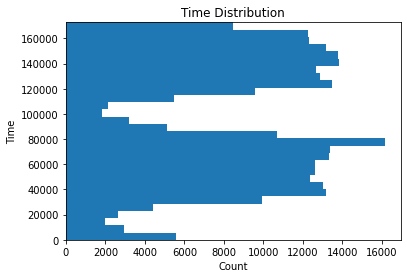

In [10]:
_,ax=plt.subplots(1,1)
bin_size=30
values=pd.cut(df_["Time"],bins=bin_size,include_lowest=True).value_counts()/len(df_)
print("value count %\n",values*100)
ax.hist(df_["Time"].values,bins=bin_size,orientation='horizontal')
ax.set_ylim(min(df_["Time"]),max(df_["Time"]))
ax.set_ylabel("Time")
ax.set_xlabel("Count")
ax.set_title("Time Distribution")

plt.show()

value count of target feature % : 
 0    99.827251
1     0.172749
Name: Class, dtype: float64


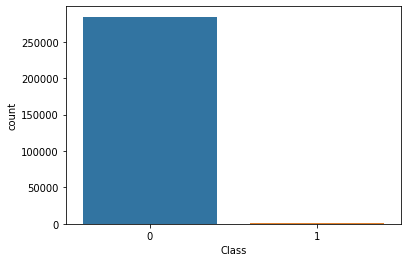

In [11]:
print("value count of target feature % : \n",df_["Class"].value_counts()*100/len(df_))
sns.countplot(x=df_["Class"],data=df_)
plt.show()

<AxesSubplot:xlabel='Class', ylabel='Amount'>

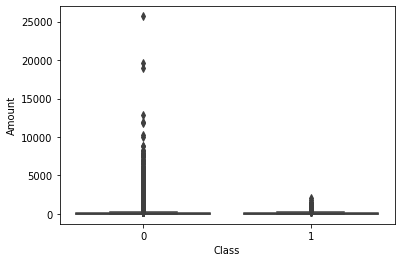

In [12]:
sns.boxplot(x="Class",y="Amount",data=df_)

<AxesSubplot:xlabel='Class', ylabel='Time'>

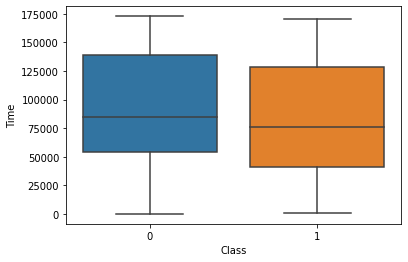

In [13]:
sns.boxplot(x="Class",y="Time",data=df_)

In [14]:
print("skewness :\n",df_.skew().sort_values(ascending=False))

skewness :
 Class     23.997579
Amount    16.977724
V28       11.192091
V21        3.592991
V7         2.553907
V6         1.826581
V10        1.187141
V4         0.676292
V26        0.576693
V9         0.554680
V11        0.356506
V19        0.109192
V13        0.065233
Time      -0.035568
V22       -0.213258
V18       -0.259880
V15       -0.308423
V25       -0.415793
V24       -0.552499
V16       -1.100966
V27       -1.170209
V14       -1.995176
V20       -2.037155
V3        -2.240155
V12       -2.278401
V5        -2.425901
V1        -3.280667
V17       -3.844914
V2        -4.624866
V23       -5.875140
V8        -8.521944
dtype: float64


In [15]:
print("kurtosis :\n",df_.kurt().sort_values(ascending=False),end="\n")

kurtosis :
 V28       933.397502
Amount    845.092646
Class     573.887843
V23       440.088659
V7        405.607417
V20       271.016113
V27       244.989241
V8        220.586974
V21       207.287040
V5        206.904560
V2         95.773106
V17        94.799719
V6         42.642494
V1         32.486679
V10        31.988239
V3         26.619551
V14        23.879462
V12        20.241870
V16        10.419131
V25         4.290412
V9          3.731311
V22         2.832967
V4          2.635455
V18         2.578341
V19         1.724970
V11         1.633921
V26         0.919006
V24         0.618871
V15         0.284769
V13         0.195300
Time       -1.293530
dtype: float64


so we need sperman rank correlation as data is not normally distributed , and we don't see much correlation , but befor that let's remove outlier of Amount & Time the scale them as their value is too high

In [16]:
q1=np.percentile(df_["Amount"],25)
q3=np.percentile(df_["Amount"],75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
outlier=df_[(df_["Amount"]>ul)|(df_["Amount"]<ll)]
print("Size of outlier % : ",outlier.shape[0]*100/len(df_))
print("Frauds among the outliers % ",outlier[outlier["Class"]==1].value_counts().sum()*100/len(df_[df_["Class"]==1]))

Size of outlier % :  11.201971861646658
Frauds among the outliers %  18.495934959349594


we first scale doen the Amount & Time feature then try to find the outliers , that way our scale of oulier will match the min,max value of V's

df_= df_[~((df_["Amount"]>ul)|(df_["Amount"]<ll).any(axis=1)]

q1 = mean - 0.675 * std
q3 = mean + 0.675 * std 
ul = q3 + 1.5 * iqr = mean + 2.7 * std
ll = q1 - 1.5 * iqr = mean - 2.7 * std


In [17]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()
df_["Amount"] = sc.fit_transform(df_["Amount"].values.reshape(-1,1))
df_["Time"] = sc.fit_transform(df_["Time"].values.reshape(-1,1))

In [18]:
df_.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.118914,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.927124,0.001727
std,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,3.495006,0.041527
min,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-0.307413,0.000000
25%,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-0.229162,0.000000
50%,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,0.000000
75%,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.770838,0.000000
max,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,358.683155,1.000000


<AxesSubplot:xlabel='Class', ylabel='Amount'>

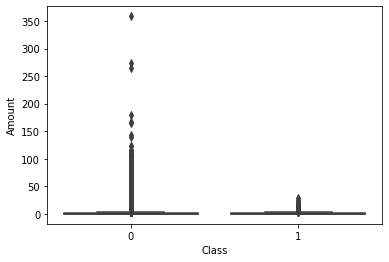

In [19]:
sns.boxplot(x="Class",y="Amount",data=df_)

<AxesSubplot:xlabel='Class', ylabel='Time'>

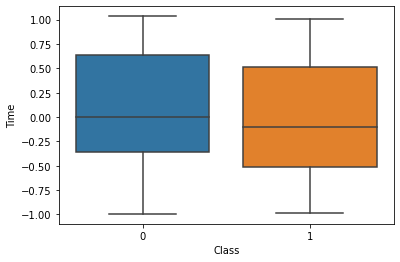

In [20]:
sns.boxplot(x="Class",y="Time",data=df_)

In [21]:
q1=np.percentile(df_["Time"],25)
q3=np.percentile(df_["Time"],75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
outlier=df_[(df_["Time"]>ul)|(df_["Time"]<ll)]
print("Size of outlier % : ",outlier.shape[0]*100/len(df_))

Size of outlier % :  0.0


In [22]:
# outlier imputation

q1=np.percentile(df_["Amount"],25)
q3=np.percentile(df_["Amount"],75)

iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr


df_.loc[df_["Amount"]>ul,"Amount"]=ul
df_.loc[df_["Amount"]<ll,"Amount"]=ll
# for row in range(len(df_)):
#     if df_.iloc[row]["Amount"] > ul:
#         df_.iloc[row]["Amount"] = ul
#     elif df_.iloc[row]["Amount"] < ll:
#         df_.iloc[row]["Amount"] =ll


outlier=df_[(df_["Amount"]>ul)|(df_["Amount"]<ll)]
print("Size of outlier % : ",outlier.shape[0]*100/len(df_))

Size of outlier % :  0.0


<AxesSubplot:xlabel='Class', ylabel='Amount'>

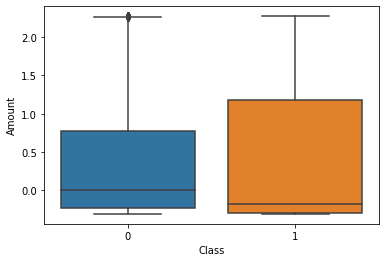

In [23]:
sns.boxplot(x="Class",y="Amount",data=df_)

<AxesSubplot:xlabel='Class', ylabel='Amount'>

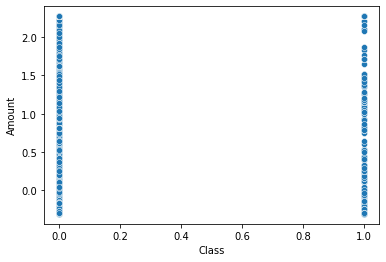

In [24]:
sns.scatterplot(x="Class",y="Amount",data=df_)

In [25]:
k=20 # we're zooming 
no_of_observations=10

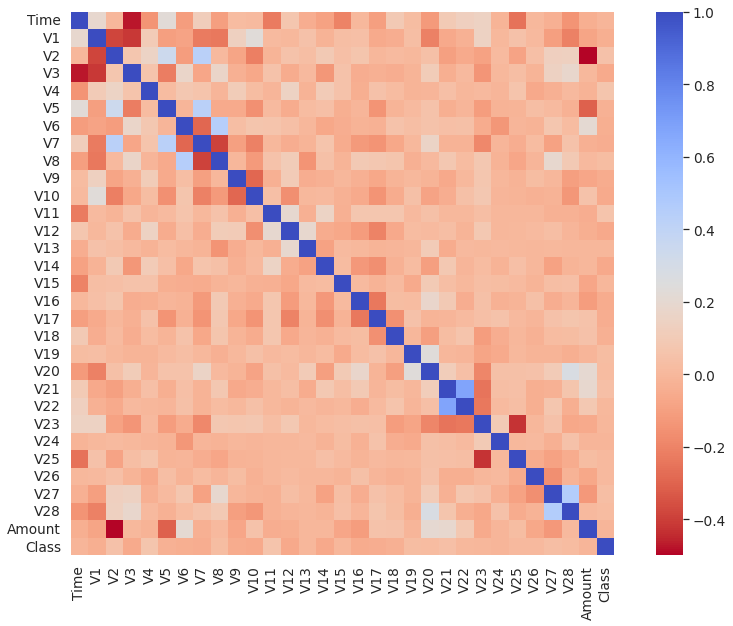

In [26]:
corr=df_.corr(method='spearman',min_periods=no_of_observations)
plt.figure(figsize=(15,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(corr,cbar=True, square=True, cmap="coolwarm_r")
plt.show()

we can see no correlation with Class , however V23 & V25 , Amount & V2, V1 & V2, V1 & V3, V3 & Time has some high negative correlation + V21 & V22 , V27 & V28 have slight to moderate possitive correlation

In [27]:
# # top 20 smallest correlation

# corr=df_.corr(method='spearman',min_periods=no_of_observations)
# nsmallest_col=corr.nsmallest(k,"Class")["Class"].index
# corr_nsmallest=np.corrcoef(df_[nsmallest_col].values.T)

# plt.figure(figsize=(15,10))
# sns.set(font_scale=1.25)
# hm = sns.heatmap(corr_nsmallest,cbar=True, annot=True, square=True, cmap="coolwarm_r",
#                  fmt='.2f', annot_kws={'size': 10}, yticklabels=nsmallest_col.values, 
#                  xticklabels=nsmallest_col.values)
# plt.show()

In [28]:
"""
We'll create new dataframe (deep copy) at each point & use fit() 
on that copy this way we can avoid data leak
"""

df=df_.copy(deep=True)

In [29]:
""""""
df=df.sample(frac=1)
non_fraud=df.loc[df["Class"]==1]
fraud=df.loc[df["Class"]==0][:492]

tmp=pd.concat([non_fraud,fraud])
df=tmp.sample(frac=1,random_state=42)
df["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [30]:
print(df.shape)
print(df_.shape)

(984, 31)
(284807, 31)


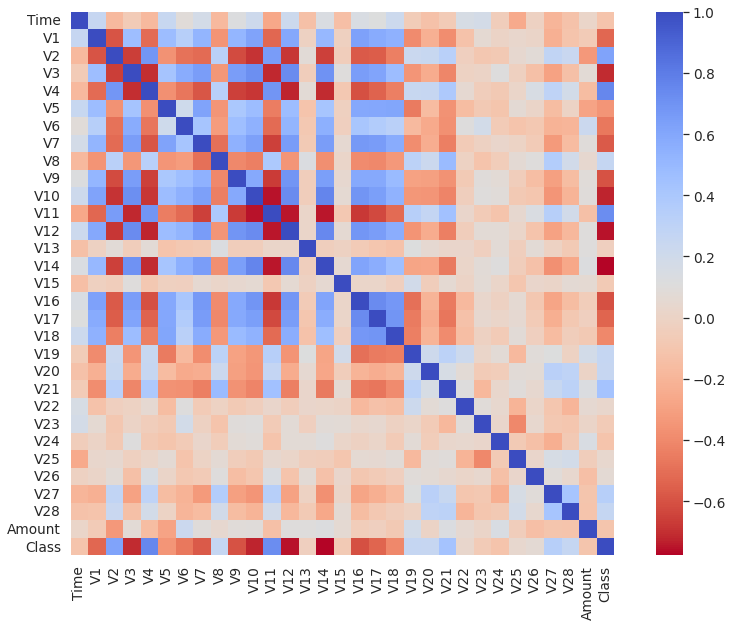

In [31]:
corr=df.corr(method='spearman',min_periods=no_of_observations)
plt.figure(figsize=(15,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(corr,cbar=True, square=True, cmap="coolwarm_r")
plt.show()

Negative Correlations: V3, V14, V12, V10 and V9 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.



Positive Correlations: V2, V4, V11, and V21 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction. 

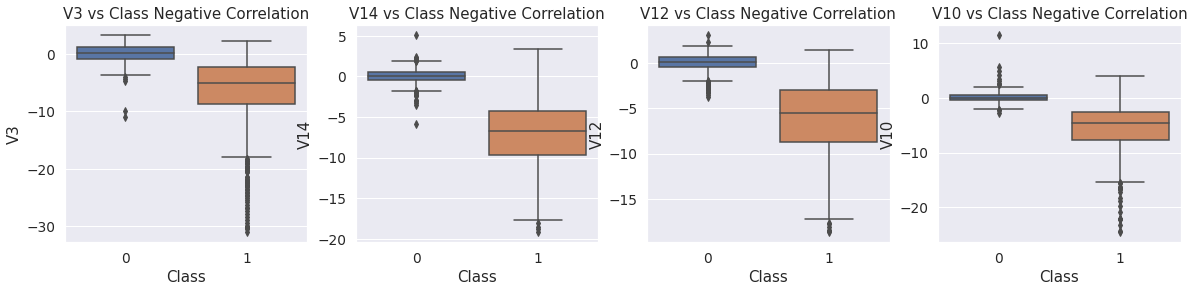

In [32]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V3", data=df,ax=axes[0])
axes[0].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=df,ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=df,ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

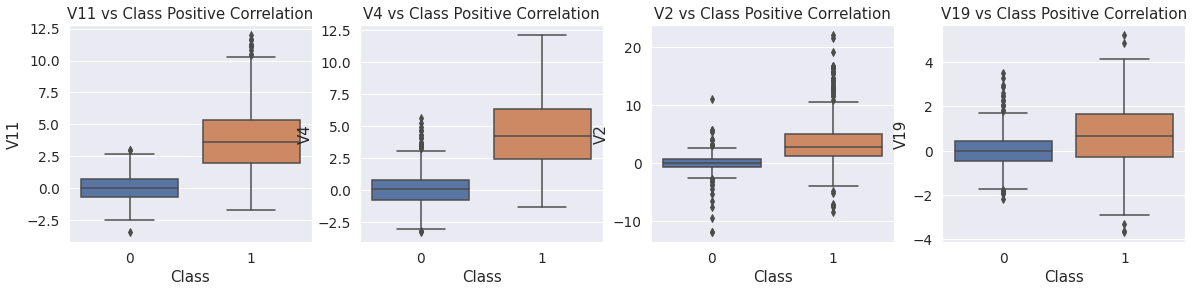

In [33]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations 
#(The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=df, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=df,  ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


In [35]:
X = df.drop("Class", axis=1)
y = df["Class"]

kf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

Label Distributions: 

[0.5 0.5]
[0.5 0.5]


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf = 3 , max_depth = 5)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print("ccp_alphas : ",ccp_alphas,end="\n")
print("\n impurities : ",impurities)

ccp_alphas :  [0.         0.00072516 0.00173348 0.00401409 0.00420715 0.00443957
 0.00467236 0.00477514 0.00499683 0.00525201 0.00561356 0.00894334
 0.02901929 0.36036931]

 impurities :  [0.04677198 0.04749714 0.04923062 0.05324471 0.05745187 0.06633101
 0.07100337 0.08055365 0.08555048 0.0960545  0.10166806 0.1106114
 0.13963069 0.5       ]


### Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. 


###### DecisionTreeClassifier.cost_complexity_pruning_path :  
Returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.



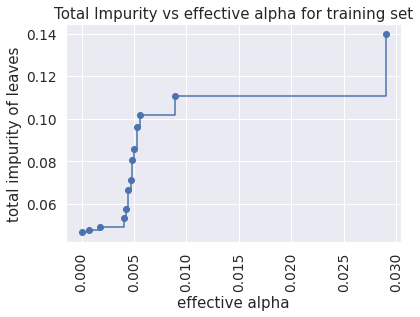

In [38]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.xticks(rotation=90)
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [39]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


Number of nodes in the last tree is: 1 with ccp_alpha: 0.3603693144665603


For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

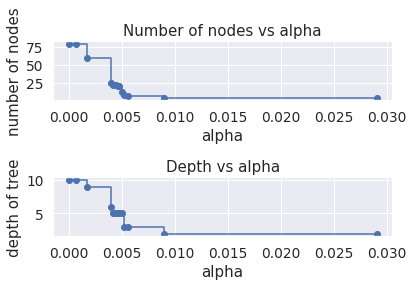

In [40]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Accuracy vs alpha for training and testing sets

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. 


As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.36 maximizes the testing accuracy.



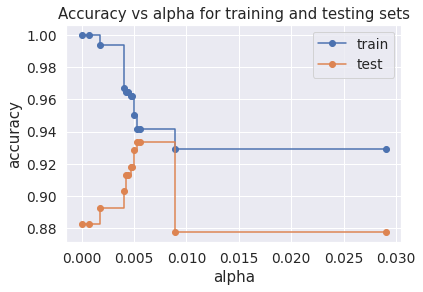

In [41]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [42]:
from sklearn.tree import plot_tree
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

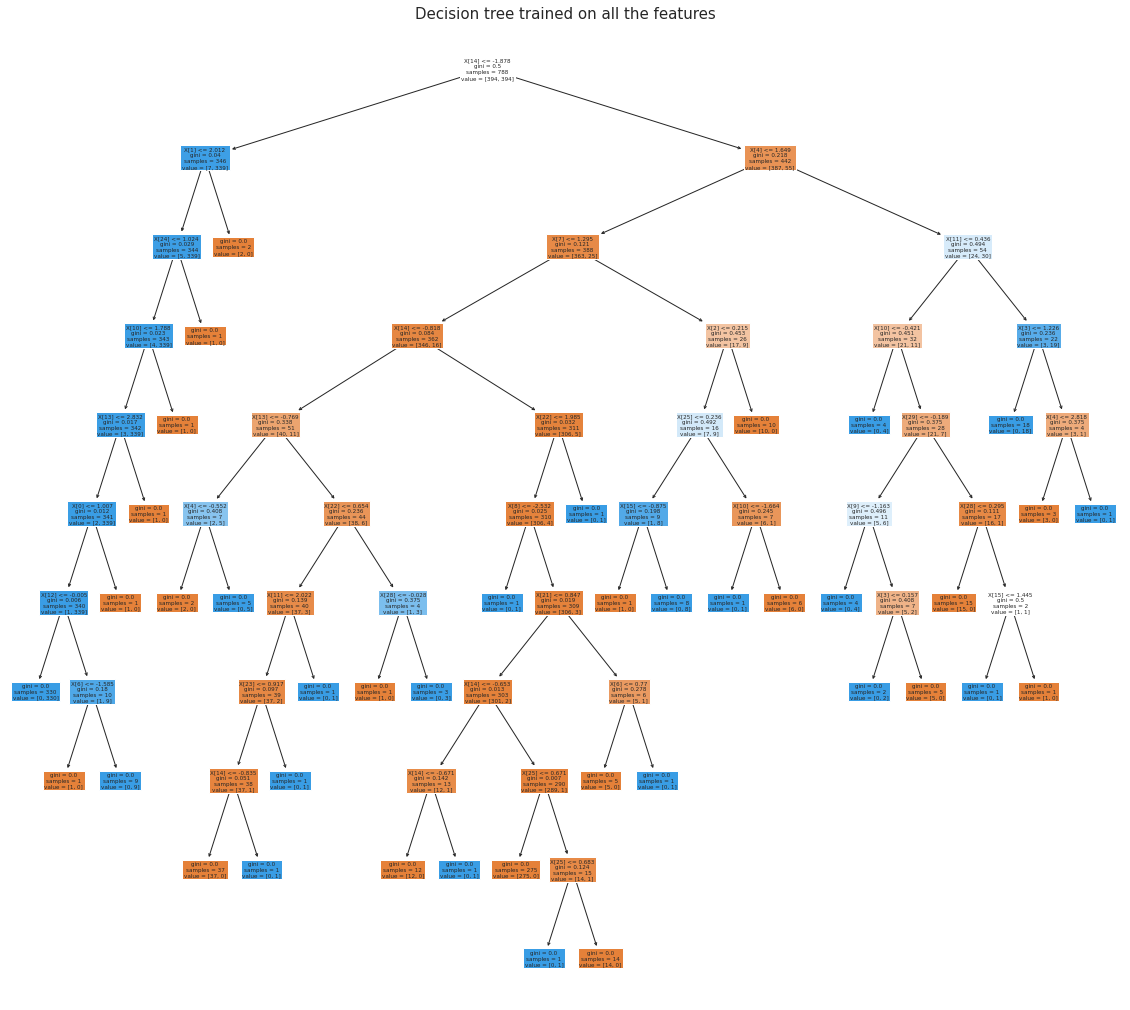

In [43]:
# Plotting Tree
plt.figure(figsize=(20,18))
#weights=np.random.randn(426)
clf = DecisionTreeClassifier().fit(X_train, y_train,sample_weight=None)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the features")
plt.show()

### Demonstration of multi-metric evaluation on cross_val_score and GridSearchCV

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [45]:
scoring = {"AUC": "roc_auc", "Accuracy": "f1_micro"}
weights=range(2, 403, 20)
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid={"min_samples_split": weights},
    scoring=scoring,
    refit="AUC",
    n_jobs=2,
    return_train_score=True,
)
gs.fit(X, y)
results = gs.cv_results_
print("results :\n",results.keys(),end="\n\n\n")
print(gs.best_estimator_,end="\n")
print(gs.best_params_,end="\n")
print("best index : ",gs.best_index_,end="\n")
print("best score : ",gs.best_score_,end="\n")
print("mean test score : ",np.mean(results.get("mean_test_Accuracy")))
print("mean train score : ",np.mean(results.get("mean_train_Accuracy")))

results :
 dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_min_samples_split', 'params', 'split0_test_AUC', 'split1_test_AUC', 'split2_test_AUC', 'split3_test_AUC', 'split4_test_AUC', 'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC', 'split0_train_AUC', 'split1_train_AUC', 'split2_train_AUC', 'split3_train_AUC', 'split4_train_AUC', 'mean_train_AUC', 'std_train_AUC', 'split0_test_Accuracy', 'split1_test_Accuracy', 'split2_test_Accuracy', 'split3_test_Accuracy', 'split4_test_Accuracy', 'mean_test_Accuracy', 'std_test_Accuracy', 'rank_test_Accuracy', 'split0_train_Accuracy', 'split1_train_Accuracy', 'split2_train_Accuracy', 'split3_train_Accuracy', 'split4_train_Accuracy', 'mean_train_Accuracy', 'std_train_Accuracy'])


DecisionTreeClassifier(min_samples_split=82, random_state=0)
{'min_samples_split': 82}
best index :  4
best score :  0.9654555761698619
mean test score :  0.9078315154923463
mean train score :  0.9386845982531585


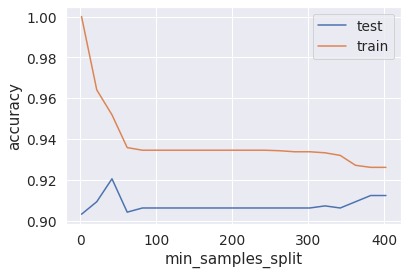

In [46]:
out=pd.DataFrame({"score":results.get("mean_test_Accuracy"),"min_samples_split":weights})
plt.plot(out["min_samples_split"],out["score"],label="test")
out=pd.DataFrame({"score":results.get("mean_train_Accuracy"),"min_samples_split":weights})
plt.plot(out["min_samples_split"],out["score"],label="train")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.show()

In [47]:
clf=clfs[5] 

print("\nThe number of classes (for single output problems) : ",clf.n_classes_,end="\n")
print("\nThe classes labels (single output problem) : ",clf.classes_,end="\n")
print("\n Return the feature importances :\n",clf.feature_importances_,end="\n")

print("\nReturn the number of leaves of the decision tree : ",clf.get_n_leaves(),end="\n")
print("\nReturn the depth of the decision tree : ",clf.get_depth(),end="\n")

print("\nThe inferred value of max_features : ",clf.max_features_,end="\n")
print("\nThe number of outputs when fit is performed : ",clf.n_outputs_,end="\n")
print("Return the decision path in the tree :\n",clf.decision_path(X_train,check_input=True),end="\n")
print("Return the index of the leaf that each sample is predicted as:\n",clf.apply(X_train,check_input=True),end="\n")


The number of classes (for single output problems) :  2

The classes labels (single output problem) :  [0 1]

 Return the feature importances :
 [0.         0.01117531 0.01126825 0.01065362 0.06616795 0.
 0.         0.01279968 0.         0.         0.01139345 0.02039203
 0.         0.01167304 0.83179432 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01268235 0.         0.         0.         0.        ]

Return the number of leaves of the decision tree :  12

Return the depth of the decision tree :  5

The inferred value of max_features :  30

The number of outputs when fit is performed :  1
Return the decision path in the tree :
   (0, 0)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 9)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 0)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 9)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (4, 0)	1
  (4, 4)	1
  (4, 16)	1
  (4, 20)	1
  (4, 21)	1
  (5, 0)	1
  (5, 4)	1
  :	:
  (783, 4)	1
  (783, 5)	1


In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,mean_squared_error

### class_weight

Here use class_weights to increase test accuracy , as we can see the accuacy has increased to 89% which was previously 88% , along with Precision vs Recall but confusion matrix says otherwise


We could have used but it won't be a good approach for less data<br>
class_weights=dict({0:1.68,1:1}) <br>clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0,class_weight=class_weights)

In [49]:
weights=np.linspace(0.05,0.95,20)
# rng=np.random.RandomState(0)
#cv=KFold(n_splits=5,random_state=rng,shuffle=True)
cv_=KFold(n_splits=6,random_state=None,shuffle=False)

gs=GridSearchCV(estimator=DecisionTreeClassifier(random_state=0,ccp_alpha=0.5),
                 param_grid={"class_weight":[{0:x,1:1.0-x}for x in weights]},
                 scoring="f1_macro",cv=cv_)
gs=gs.fit(X_train,y_train)
print("Best parameters : ",gs.best_params_)

Best parameters :  {'class_weight': {0: 0.5236842105263158, 1: 0.47631578947368425}}


<AxesSubplot:xlabel='weights'>

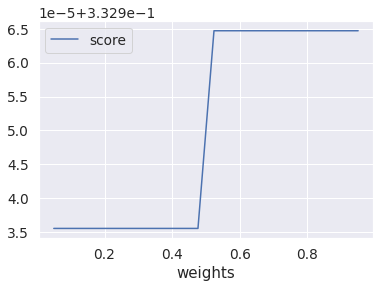

In [50]:
out=pd.DataFrame({"score":gs.cv_results_["mean_test_score"],"weights":weights})
out.plot(x="weights")

Accuracy Score :  0.5
Classification report :
               precision    recall  f1-score   support

           0       0.50      1.00      0.67        98
           1       0.00      0.00      0.00        98

    accuracy                           0.50       196
   macro avg       0.25      0.50      0.33       196
weighted avg       0.25      0.50      0.33       196



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


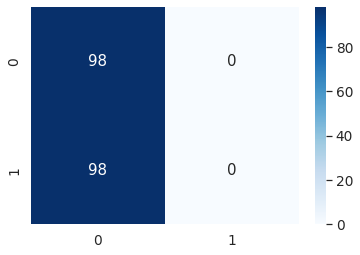

In [51]:
clf=DecisionTreeClassifier(**gs.best_params_,ccp_alpha=0.38).fit(X_train,y_train)
y_test_pred=clf.predict(X_test)
print("Accuracy Score : ",accuracy_score(y_test,y_test_pred),end="\n")
cf_mat=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cf_mat,annot=True,cmap='Blues')
print("Classification report :\n",classification_report(y_test,y_test_pred),end="\n")

### Oversampling , Under sampling 

In [52]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [53]:
df=df_.copy(deep=True)
X = df.drop("Class", axis=1)
y = df["Class"]

kf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:590: FutureWarning: Pass sampling_strategy=0.3 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of classes before fit Counter({0: 227452, 1: 394})
The number of classes after fit Counter({0: 227452, 1: 68235})
Accuracy Score :  0.9990344270641316
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.78      0.61      0.69        98

    accuracy                           1.00     56961
   macro avg       0.89      0.81      0.84     56961
weighted avg       1.00      1.00      1.00     56961



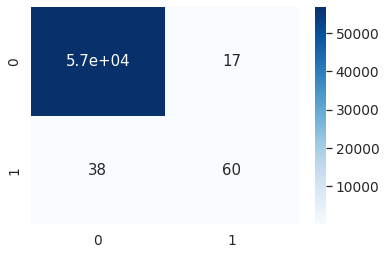

In [54]:
os=RandomOverSampler(0.30)
X_train_,y_train_=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_)))


dt=DecisionTreeClassifier()
dt.fit(X_train_,y_train_)

y_pred=dt.predict(X_test)
cf_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_mat,annot=True,cmap="Blues")
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Classification report :\n",classification_report(y_test,y_pred))



/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:590: FutureWarning: Pass sampling_strategy=0.99 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of classes before fit Counter({0: 227452, 1: 394})
The number of classes after fit Counter({0: 397, 1: 394})
Accuracy Score :  0.20610593212900055
Classification report :
               precision    recall  f1-score   support

           0       1.00      0.20      0.34     56863
           1       0.00      0.97      0.00        98

    accuracy                           0.21     56961
   macro avg       0.50      0.59      0.17     56961
weighted avg       1.00      0.21      0.34     56961



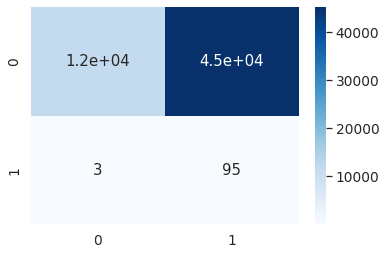

In [55]:
ns=NearMiss(0.99)
X_train_,y_train_=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_)))

dt=DecisionTreeClassifier()
dt.fit(X_train_,y_train_)

y_pred=dt.predict(X_test)
cf_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_mat,annot=True,cmap="Blues")
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Classification report :\n",classification_report(y_test,y_pred))

In [56]:
# sm=SMOTETomek(0.70)
# X_train_,y_train_=sm.fit_resample(X_train,y_train)
# print("The number of classes before fit {}".format(Counter(y_train)))
# print("The number of classes after fit {}".format(Counter(y_train_)))


In [57]:
def plot_learning_curves(model, X_train,y_train,X_test,y_test):
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.show()



In [61]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
# plot_learning_curves(dt,X_train,y_train,X_test,y_test)

Accuracy Score :  0.9989817594494479
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.72      0.66      0.69        98

    accuracy                           1.00     56961
   macro avg       0.86      0.83      0.85     56961
weighted avg       1.00      1.00      1.00     56961



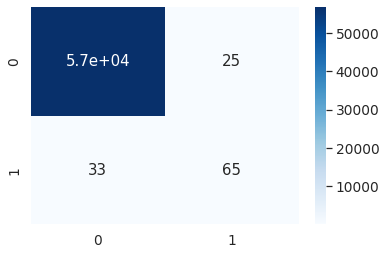

In [62]:
y_pred=dt.predict(X_test)
cf_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_mat,annot=True,cmap="Blues")
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Classification report :\n",classification_report(y_test,y_pred))

**Using Neural Net**

In [79]:
df=df_.copy(deep=True)
X = df.drop("Class", axis=1)
y = df["Class"]

kf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [80]:
from sklearn.preprocessing import normalize
X_train = normalize(X_train)

In [110]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import adam_v2
from keras.metrics import categorical_crossentropy
import tensorflow as tf

In [65]:
n_inputs = X_train.shape[1]

model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])


2022-10-18 06:20:19.768091: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 2,484
Trainable params: 2,484
Non-trainable params: 0
_________________________________________________________________


In [106]:
lr,epochs=0.001,10
optimizer = adam_v2.Adam(learning_rate=lr, decay=lr/epochs)
model.compile(optimizer=optimizer , loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [107]:
model.fit(X_train, y_train, validation_split=0.2, 
                      batch_size=23, epochs=epochs, shuffle=True, verbose=2)



Epoch 1/10
7926/7926 - 16s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0026 - val_accuracy: 0.9996
Epoch 2/10
7926/7926 - 18s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0031 - val_accuracy: 0.9996
Epoch 3/10
7926/7926 - 19s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0029 - val_accuracy: 0.9996
Epoch 4/10
7926/7926 - 17s - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0032 - val_accuracy: 0.9997
Epoch 5/10
7926/7926 - 18s - loss: 9.1821e-04 - accuracy: 0.9998 - val_loss: 0.0034 - val_accuracy: 0.9997
Epoch 6/10
7926/7926 - 18s - loss: 8.4856e-04 - accuracy: 0.9998 - val_loss: 0.0034 - val_accuracy: 0.9996
Epoch 7/10
7926/7926 - 21s - loss: 8.1797e-04 - accuracy: 0.9998 - val_loss: 0.0034 - val_accuracy: 0.9996
Epoch 8/10
7926/7926 - 19s - loss: 7.7023e-04 - accuracy: 0.9998 - val_loss: 0.0037 - val_accuracy: 0.9996
Epoch 9/10
7926/7926 - 19s - loss: 7.3118e-04 - accuracy: 0.9998 - val_loss: 0.0041 - val_accuracy: 0.9996
Epoch 10/10
7926/7926 - 19s - loss: 6.9601e-04 - accu

In [133]:
#X_test.shape
y_pred = model.predict(X_test, batch_size=9, verbose=0)

In [134]:
df_pred = pd.DataFrame(data=y_pred,dtype=np.int32)
for i in range(len(df_pred)):
    if df_pred.iloc[i,0]==0:
        df_pred.iloc[i,0]=df_pred.iloc[i,1]

df_pred.drop(1,axis=1,inplace=True)
y_pred=df_pred.squeeze()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  """Entry point for launching an IPython kernel.


In [135]:
y_pred.values[:5]

array([1, 1, 1, 1, 1], dtype=int32)

In [136]:
y_test.values[:5]

array([1, 1, 1, 1, 1])

In [137]:
cf_mat = confusion_matrix(y_pred,y_test)
print(f"Confusion Matrix for model")
print(cf_mat)
print(f"Classification for model")
print(classification_report(y_test,y_pred))

Confusion Matrix for model
[[    0     2]
 [56863    96]]
Classification for model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     56863
           1       0.00      0.98      0.00        98

    accuracy                           0.00     56961
   macro avg       0.00      0.49      0.00     56961
weighted avg       0.00      0.00      0.00     56961



array([1.0000000e+00, 2.4880606e-10], dtype=float32)

(56961, 2)

(56961,)

In [91]:
y_test.iloc[0]

1